In [3]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [4]:
# Download the data
data = et.data.get_data('colorado-flood')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', "data"))

In [5]:
# Define relative path to the data
file_path = os.path.join("colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

# Import the file as a pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path)
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


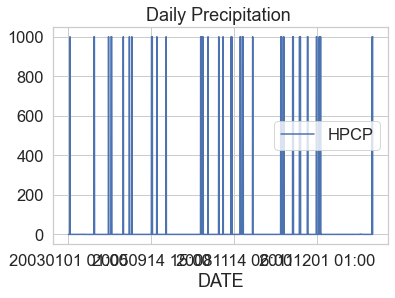

In [6]:
boulder_precip_2003_2013.plot(x="DATE",
                              y="HPCP",
                              title="Daily Precipitation ")
plt.show()

In [7]:
# Look at the range of values in the data - specifically the HPCP column
boulder_precip_2003_2013["HPCP"].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [8]:
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [9]:
# Import data using datetime and no data value
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       # Make sure the dates import in datetime format
                                       parse_dates=['DATE'],
                                       # Set DATE as the index so you can subset data by time period
                                       index_col=['DATE'],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values=['999.99'])

# View the data
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [10]:
# View summary statistics == Notice the DATE column is not included
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


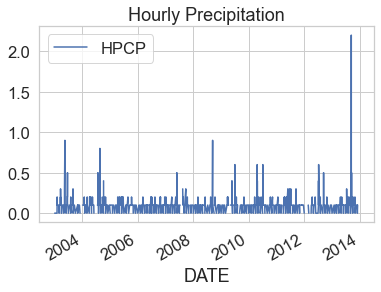

In [11]:
boulder_precip_2003_2013.plot(y="HPCP",
                              title="Hourly Precipitation")
plt.show()

In [12]:
# Subset data from 2005
precip_2005 = boulder_precip_2003_2013['2005']
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [13]:
# Remove missing data values
precip_2005_clean = precip_2005.dropna()

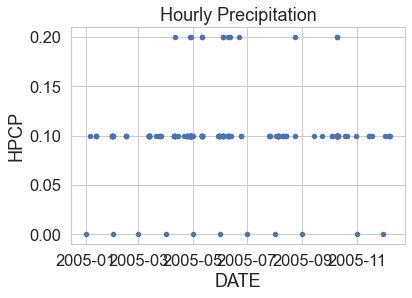

In [14]:
# Plot the data using pandas

precip_2005_clean.reset_index().plot(x="DATE",
                                     y="HPCP",
                                     title="Hourly Precipitation",
                                     kind="scatter")
plt.show()

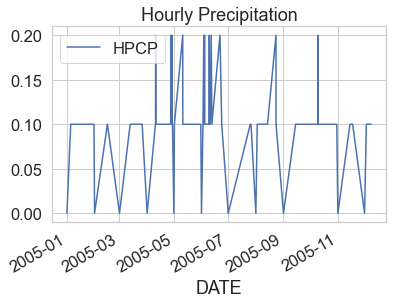

In [15]:
# Plot the data using pandas

precip_2005_clean.plot(y="HPCP", title="Hourly Precipitation")
plt.show()

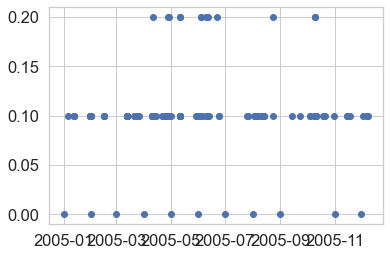

In [16]:
# Plot the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_clean.index.values,
           y=precip_2005_clean["HPCP"])
plt.show()

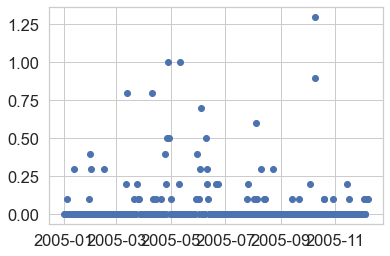

In [17]:
precip_2005_daily = precip_2005_clean.resample("D").sum()
# Plot the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_daily.index.values,
           y=precip_2005_daily["HPCP"])
plt.show()

In [18]:
precip_2012 = boulder_precip_2003_2013['2012'].dropna()
precip_2013 = boulder_precip_2003_2013['2013'].dropna()

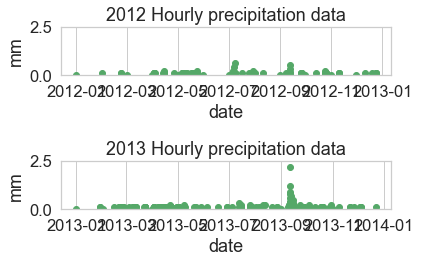

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1)

ax1.scatter(x=precip_2012.index.values,
            y=precip_2012["HPCP"],
            color="g")
ax1.set(
    ylim=[0, 2.5],
    title="2012 Hourly precipitation data",
    xlabel="date",
    ylabel="mm")
ax2.scatter(x=precip_2013.index.values,
            y=precip_2013["HPCP"],
            color="g")
ax2.set(
    ylim=[0, 2.5],
    title="2013 Hourly precipitation data",
    xlabel="date",
    ylabel="mm")

f.tight_layout()

plt.show()


In [21]:
boulder_precip_sep_nov_2013 = boulder_precip_2003_2013['2013-09-01':'2013-11-01']

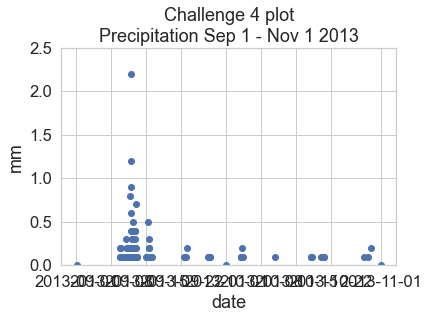

In [40]:
# Plot the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=boulder_precip_sep_nov_2013.index.values,
           y=boulder_precip_sep_nov_2013["HPCP"])
ax.set(
    ylim=[0, 2.5],
    title="Challenge 4 plot\nPrecipitation Sep 1 - Nov 1 2013",
    xlabel="date",
    ylabel="mm"
)
plt.show()

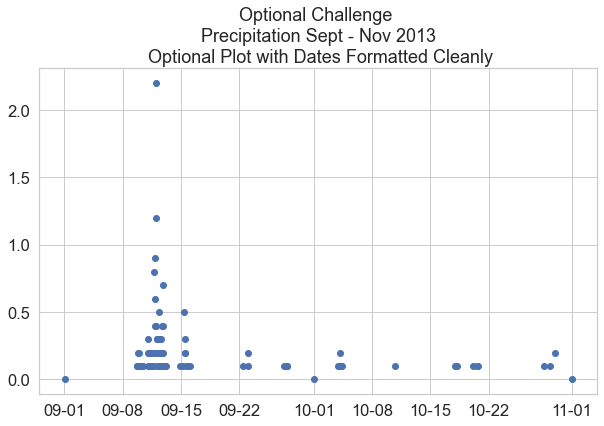

In [41]:
from matplotlib.dates import DateFormatter

# Place your code to plot your data here
flood_data = boulder_precip_2003_2013['2013-09-01':'2013-11-01']

f, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x=flood_data.index.values,
           y=flood_data["HPCP"])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.set(title="Optional Challenge \n Precipitation Sept - Nov 2013 \n Optional Plot with Dates Formatted Cleanly")
plt.show()